In [1]:
# for numbers
import xarray as xr
import numpy as np
import pandas as pd

# for figures
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
stem = "/project/amp/brianpm/TemperatureExtremes/Derived/"
obsfil = "CPC_tmax_dayofyear_quantiles_15daywindow_c20190622.nc"
mdlfil = "f.e13.FAMIPC5CN.ne30_ne30.beta17.TREFMXAV.dayofyear_quantiles_15daywindow_c20190626.nc"
obs_ds = xr.open_dataset(stem+obsfil)
mdl_ds = xr.open_dataset(stem+mdlfil)


In [19]:
mdl_ds

<xarray.Dataset>
Dimensions:   (lat: 360, lon: 720, quantile: 9, time: 365)
Coordinates:
  * quantile  (quantile) float64 0.01 0.05 0.1 0.25 0.5 0.75 0.9 0.95 0.99
  * lat       (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon       (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Dimensions without coordinates: time
Data variables:
    TREFMXAV  (time, quantile, lat, lon) float64 ...

In [20]:
obs_90 = obs_ds['tmax'].sel(quantile=.90)
mdl_90 = mdl_ds['TREFMXAV'].sel(quantile=.90) 

In [21]:
obs_example = obs_90.sel(lat=33.75 , lon=360-84.39, method='nearest').compute()
mdl_example = mdl_90.sel(lat=33.75 , lon=360-84.39, method='nearest').compute()

In [43]:
obs_example

<xarray.DataArray 'tmax' (time: 366)>
array([18.769857, 18.693696, 18.691326, ..., 18.764643, 18.789009, 18.769857])
Coordinates:
    quantile  float64 0.9
    lat       float32 33.75
    lon       float32 275.75
Dimensions without coordinates: time
Attributes:
    long_name:  Daily Maximum Temperature
    units:      degC

In [42]:
obs_jan = obs_example[obs_example['time.month'] == 1]
obs_jan

KeyError: 'time'

In [26]:
bins = np.linspace(-20, 40, 61)

In [30]:
obs_hist, edges = np.histogram(obs_example, bins=bins, density=True)

In [38]:
bin_ctr = edges[0:-1] + (edges[1]-edges[0])/2

<BarContainer object of 60 artists>

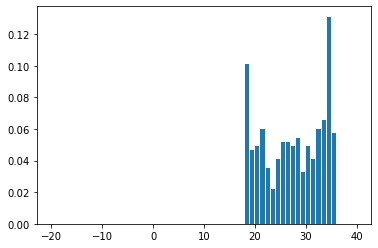

In [41]:


fig1, ax1 = plt.subplots()
ax1.bar(bin_ctr, obs_hist)

In [36]:
bin_ctr

array([-19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5,
       -10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,
        -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,
         7.5,   8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,
        16.5,  17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,
        25.5,  26.5,  27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,
        34.5,  35.5,  36.5,  37.5,  38.5])